## EO-LEARN
eo-learn library acts as a bridge between Earth observation/Remote sensing field and Python ecosystem for data science and machine learning.
- EO-LEARN  make entry to the field of remote sensing for non-experts easier. 
- EO-LEARN bring the state-of-the-art tools for computer vision, machine learning, and deep learning existing in Python ecosystem to remote sensing experts.

EO-LEARN is easy to use, encourages collaboration, sharing and reusing of specific tasks in a typical EO-value-extraction workflow, such as cloud masking, image co-registration, feature extraction, classification, etc. 

It uses NumPy arrays and Shapely geometries to store and handle remote sensing data. For details on how to this you can find documentation on [EO-Documentation](https://eo-learn.readthedocs.io/en/latest/index.html).

###### Install
Follow the following link for installation

### EO-Learn Building block

The EO-Learn consists of three main building blocks; **EO-patch**, **EO-Task**, and **EO-workflow**. 

### EOPatch

The EO-patch stores all data instances as dictionary objects. The object store NumPy arrays and Shapely geometries for time-dependent spatial information, time-independent spatial information and time-dependent and time-independent scalar information (e.g. labels for change detection, sun angles, etc.). These include satellite imagery data, enhanced features, metadata, and corresponding vector data as illustrated in figure below. Information in any format readable by python packages can also be stored in EO-patch object.

![alt text](eo_patch.png "Title")

EO data can be divided into categories, called "feature types" according to the following properties:

| `FeatureType` | Type of data | Time component |  Spatial component | Type of values | Python object | Shape |
| --- | --- | --- | --- | --- | --- | --- |
| DATA | raster | <span style="color:green">yes</span> | <span style="color:green">yes</span> | float | `numpy.ndarray` | `t x n x m x d` |
| MASK | raster | <span style="color:green">yes</span> | <span style="color:green">yes</span> | integer | `numpy.ndarray` | `t x n x m x d` |
| SCALAR | raster | <span style="color:green">yes</span> | <span style="color:red">no</span> | float | `numpy.ndarray` | `t x d` |
| LABEL | raster | <span style="color:green">yes</span> | <span style="color:red">no</span> | integer | `numpy.ndarray` | `t x d` |
| DATA_TIMELESS | raster | <span style="color:red">no</span> | <span style="color:green">yes</span> | float | `numpy.ndarray` | `n x m x d` |
| MASK_TIMELESS | raster | <span style="color:red">no</span> | <span style="color:green">yes</span> | integer | `numpy.ndarray` | `n x m x d` |
| SCALAR_TIMELESS | raster | <span style="color:red">no</span> | <span style="color:red">no</span> | float | `numpy.ndarray` | `d` |
| LABEL_TIMELESS | raster | <span style="color:red">no</span> | <span style="color:red">no</span> | integer | `numpy.ndarray` | `d` |
| VECTOR | vector | <span style="color:green">yes</span> | <span style="color:green">yes</span> | / | `geopandas.GeoDataFrame` | Required columns `geometry` and `TIMESTAMP` |
| VECTOR_TIMELESS | vector | <span style="color:red">no</span> | <span style="color:green">yes</span> | / | `geopandas.GeoDataFrame` | Required column `geometry` |
| META_INFO | anything | <span style="color:red">no</span> | <span style="color:red">no</span> | anything | anything | anything |
| TIMESTAMP | timestamps | <span style="color:green">yes</span> | <span style="color:red">no</span> | datetime | `list(datetime.datetime)` | `t` |
| BBOX | bounding box and CRS | <span style="color:red">no</span> | <span style="color:green">yes</span> | coordinates | `sentinelhub.BBox` | / |

Note: `t` specifies time component, `n` and `m` are spatial components (height and width), and `d` is an additional component for data with multiple channels.

In [3]:
import os
from eolearn.core import EOPatch
import warnings
warnings.filterwarnings('ignore')

In [4]:
INPUT_FOLDER = 'data/'
INPUT_EOPATCH =  os.path.join(INPUT_FOLDER, 'eopatch_8') 
eopatch = EOPatch.load(INPUT_EOPATCH, lazy_loading=True)# There is no need to load all data in the memory right away

In [6]:
## Inspect feature avaialble in the eopacth
eopatch.get_features()

{<FeatureType.DATA: 'data'>: {'BANDS-S2-L1C',
  'NDVI',
  'TRUE-COLOR-S2-L2A',
  'clp'},
 <FeatureType.MASK: 'mask'>: {'IS_DATA', 'clm'},
 <FeatureType.SCALAR: 'scalar'>: {'PARKING_BBOX'},
 <FeatureType.MASK_TIMELESS: 'mask_timeless'>: {'PARKING_ENVELOPE',
  'PARKING_MASK'},
 <FeatureType.VECTOR_TIMELESS: 'vector_timeless'>: {'parking',
  'parking_envelope'},
 <FeatureType.META_INFO: 'meta_info'>: {'maxcc',
  'service_type',
  'size_x',
  'size_y',
  'time_difference',
  'time_interval'},
 <FeatureType.BBOX: 'bbox'>: True,
 <FeatureType.TIMESTAMP: 'timestamp'>: True}

There are multiple ways how to access a feature in the EOPatch

In [8]:
#bands = eopatch.get_feature(FeatureType.DATA, 'TRUE-COLOR-S2-L1C')
bands = eopatch.data['TRUE-COLOR-S2-L2A']

In [11]:
from eolearn.core import FeatureType

In [12]:
# The most common ones are
bands = eopatch[FeatureType.DATA]['TRUE-COLOR-S2-L2A']
# or
bands = eopatch[(FeatureType.DATA, 'TRUE-COLOR-S2-L2A')]
type(bands), bands.shape

(numpy.ndarray, (8, 478, 493, 3))

Vector features are handled by `geopandas`

In [36]:
gdf=eopatch[FeatureType.VECTOR_TIMELESS]['parking']

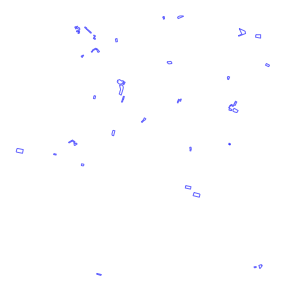

In [37]:
fig = figure(columns=2)
ax = fig.gca()
gdf.plot(ax=ax, facecolor='w',edgecolor='b',alpha=0.6)
plt.axis('off');
plt.tight_layout();

Special features are bounding box and timestamps

2019-01-16 11:46:31 -- 2020-04-07 11:36:27, #timestamps=8
BBox(((-130403.63654008931, 5949067.836193201), (-125477.68264367987, 5953844.845119248)), crs=CRS('32631'))


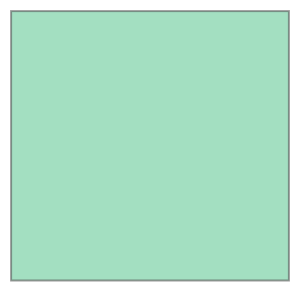

In [14]:
print(f'{eopatch.timestamp[0]} -- {eopatch.timestamp[-1]}, #timestamps={len(eopatch.timestamp)}')
print(repr(eopatch.bbox))
eopatch.bbox

#### Plotting

`EOPatch` come with plotting functionalities. It  will only work if you successfully install `eo-learn-visualization[FULL]`


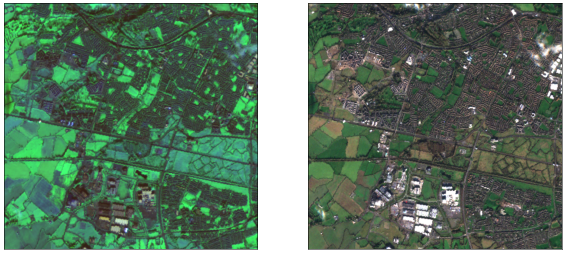

In [35]:
import matplotlib.pyplot as plt
from vis_functions import *
%matplotlib inline
fig, (ax1, ax2)=plt.subplots(1, 2, figsize = set_figure_size(fig_width=10))
ax1.imshow(np.clip(eopatch.data['BANDS-S2-L1C'][0][...,[2,7,11]]*2.5, 0, 1), vmin=0, vmax=1);
ax2.imshow(np.clip(eopatch.data['TRUE-COLOR-S2-L2A'][0]*2.5, 0, 1), vmin=0, vmax=1);
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([]);

### Creating an EO-patches

Let's create a new EOPatch and store some features inside.

In [38]:
new_eopatch = EOPatch()
new_eopatch[FeatureType.DATA]['BANDS'] = eopatch[FeatureType.DATA]['BANDS-S2-L1C']
new_eopatch[FeatureType.MASK_TIMELESS]['NEW_MASK'] = np.zeros((10, 10, 13), dtype=np.uint8)

# The following wouldn't work as there are restrictions to what kind of data can be stored in each feature type
# new_eopatch[FeatureType.MASK]['NEW_MASK'] = np.zeros((10, 10, 13), dtype=np.uint8)
# new_eopatch[FeatureType.DATA_TIMELESS]['NEW_MASK'] = np.zeros((10, 10, 13), dtype=np.uint8)
# new_eopatch[FeatureType.VECTOR]['NEW_MASK'] = np.zeros((10, 10, 13), dtype=np.uint8)

new_eopatch

EOPatch(
  data: {
    BANDS: numpy.ndarray(shape=(8, 478, 493, 13), dtype=float32)
  }
  mask: {}
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {
    NEW_MASK: numpy.ndarray(shape=(10, 10, 13), dtype=uint8)
  }
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {}
  bbox: None
  timestamp: []
)

In [39]:
#It is also possible to delete a feature
del new_eopatch[FeatureType.DATA]['BANDS']

new_eopatch

EOPatch(
  data: {}
  mask: {}
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {
    NEW_MASK: numpy.ndarray(shape=(10, 10, 13), dtype=uint8)
  }
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {}
  bbox: None
  timestamp: []
)

We can save EOPatch into a local folder. 
In case of an EOPatch already existing in the specified location, we also permit to overwrite its features.

### EO-Task

Any operation on EOPatch instances is performed by EOTask instances which is a single well-defined operation on one or more EOPatch objectsTasks are grouped by scope and packaged into separate Python sub-packages, which currently are:

- **eo-learn-core** — The core sub-package which implements the basic building blocks (EOPatch, EOTask and EOWorkflow) and commonly used functionalities.
- **eo-learn-io** — Input/output sub-package that deals with obtaining data from Sentinel Hub services and Geopedia.
- **eo-learn-mask** — Collection of tasks used for masking of data and calculation of cloud masks.
- **eo-learn-features** — A collection of tasks for extracting data properties and feature manipulation. Examples include tasks for computing spatio-temporal and Haralick features, as well as interpolation tasks.
- **eo-learn-geometry** — Sub-package to handle geometric transformations, such as vector to raster conversion, and sampling of label masks for generating training sets for ML methods.
- **eo-learn-ml-tools** — Collection of ML utility tasks useful to set up or validate a ML model.
- **eo-learn-coregistration** — Collection of tasks that implement different image co-registration techniques.

For a list of currently implemented EOTask have a look [here](https://eo-learn.readthedocs.io/en/latest/eotasks.html). `EOTask`, which is a single well-defined operation on one or more `EOPatch` objects.

`EOTask`, which is a single well-defined operation on one or more `EOPatch` objects.

We can create a new EOTask by creating a class that inherits from the abstract `EOTask` class:


```Python
class FooTask(EOTask):
    
    def __init__(self, foo_param):
        """ Task-specific parameters
        """
        self.foo_param = foo_param
        
    def execute(self, eopatch, *, patch_specific_param):
        
       # Do what foo does on EOPatch and return it
    
        return eopatch
```

- In the initialization method we define task-specific parameters.
- Each task has to implement the `execute` method.
- `execute` method has to be defined in a way that:
    * Positional arguments have to be instances of `EOPatch`
    * Keyword arguments have to be anything else (i.e. `EOPatch` specific parameters)
- Otherwise the task itself can do anything.

Example of a task that adds a new feature to existing `EOPatch`:

In [44]:
from eolearn.core import EOTask


class AddFeature(EOTask):
    """Adds a feature to the given EOPatch.

    :param feature: Feature to be added
    :type feature: (FeatureType, feature_name) or FeatureType
    """
    def __init__(self, feature):
        self.feature = feature

    def execute(self, eopatch, *, data):
        """Returns the EOPatch with added features.

        :param eopatch: input EOPatch
        :type eopatch: EOPatch
        :param data: data to be added to the feature
        :type data: object
        :return: input EOPatch with the specified feature
        :rtype: EOPatch
        """
        eopatch[self.feature] = data

        return eopatch

In [45]:
eopatch = EOPatch()

add_feature_task = AddFeature((FeatureType.DATA, 'NEW_BANDS'))

data = np.zeros((5, 100, 100, 13))

eopatch = add_feature_task.execute(eopatch, data=data)
# or shorter:
# eopatch = add_feature_task(eopatch, data)

eopatch

EOPatch(
  data: {
    NEW_BANDS: numpy.ndarray(shape=(5, 100, 100, 13), dtype=float64)
  }
  mask: {}
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {}
  bbox: None
  timestamp: []
)

### Problem 1: Create a new task called RenameFeature which changes a name of a feature in an EOPatch.

## EO-workflow

EOTasks can be joined into acyclic processing graphs. Class `EOWorkflow` implements such a functionality where EOTask instances are vertices of the graph and EOPatch instances flow through the edges connecting the vertices. Once the workflow has been defined, it can be run in parallel to different input EOPatch instances, allowing to automatically process large amounts of spatio-temporal data. EOWorkflow also provides execution monitoring reports and logs, such as input parameters of EOTask, elapsed times, memory usage and raised exceptions, facilitating execution control and versioning of complete ML pipelines.eopatch

In [48]:

from eolearn.core import EOWorkflow
from eolearn.core import LoadFromDisk, SaveToDisk

new_feature = FeatureType.LABEL, 'NEW_LABEL'

load_task = LoadFromDisk(folder=INPUT_FOLDER)
add_feature_task = AddFeature(new_feature)
save_task = SaveToDisk(folder=OUTPUT_FOLDER, overwrite_permission=OverwritePermission.OVERWRITE_FEATURES)

# EOWorkflow is initialized by defining a graph of tasks
workflow = EOWorkflow([
    (load_task, [], 'Load EOPatch'),
    (add_feature_task, [load_task], 'Add a new feature'),
    (save_task, [add_feature_task], 'Save EOPatch')
])

# EOWorkflow is executed by specifying EOPatch related parameters
#result = workflow.execute({
    #load_task: {'eopatch_folder': 'TutorialEOPatch'},
    #add_feature_task: {'data': np.zeros((10, 3), dtype=np.uint8)},
    #save_task: {'eopatch_folder': 'WorkflowEOPatch'}
#})

#result

In [49]:
workflow

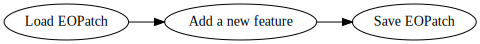

In [50]:
workflow.dependency_graph()

For a linear workflow such as the one above we can also use the LinearWorkflow class.

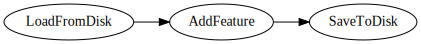

In [52]:
from eolearn.core import LinearWorkflow
workflow = LinearWorkflow(load_task, add_feature_task, save_task)
#result = workflow.execute({
    #load_task: {'eopatch_folder': 'TutorialEOPatch'},
    #add_feature_task: {'data': np.zeros((10, 3), dtype=np.uint8)},
    #save_task: {'eopatch_folder': 'OutputEOPatch2'}
#})
                                    
workflow.dependency_graph()
